In [9]:
import json
import numpy as np
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [89]:
sentence = [
    'I love dog',
    'I, love cat',
    'Animals are amazing',
    'Hello to the world'
]

tokenizer = Tokenizer(100, oov_token='<oov>')
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
print(word_index)

sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence, maxlen=5)
print(sequence)
print(padded)

{'<oov>': 1, 'i': 2, 'love': 3, 'dog': 4, 'cat': 5, 'animals': 6, 'are': 7, 'amazing': 8, 'hello': 9, 'to': 10, 'the': 11, 'world': 12}
[[2, 3, 4], [2, 3, 5], [6, 7, 8], [9, 10, 11, 12]]
[[ 0  0  2  3  4]
 [ 0  0  2  3  5]
 [ 0  0  6  7  8]
 [ 0  9 10 11 12]]


In [11]:
with open('./DATA/sarcasm_dataset/Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
    data = f.readlines()
    data_store = [json.loads(temp) for temp in data]
    
labels = []
headlines = []
articles = []

for i in data_store:
    labels.append(i['is_sarcastic'])
    headlines.append(i['headline'])
    articles.append(i['article_link'])    

In [4]:
vocab_size = 10000
embedding_dims = 16
max_len=40
oov_tok='<oov>'
trunc_type='post'
padding_type='post'

In [17]:
headlines = np.array(headlines)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(headlines, labels, test_size=0.2)

tokenizer = Tokenizer(vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding=padding_type, truncating=trunc_type)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding=padding_type, truncating=trunc_type)

# y_train = np.array(y_train)
# y_test - np.array(y_test)

(22895, 40)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(40, 'relu', input_shape=([40])),
    Dense(80, 'relu'),
    Dropout(0.1),
    Dense(150, 'relu'),
    Dropout(0.1),
    Dense(60, 'relu'),
    Dropout(0.2),
    Dense(40, 'relu'),
    Dropout(0.2),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_19 (Dense)             (None, 80)                3280      
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)               12150     
_________________________________________________________________
dropout_13 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 60)                9060      
_________________________________________________________________
dropout_14 (Dropout)         (None, 60)               

In [51]:
import matplotlib.pyplot as plt

def plot_history(history):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = list(range(len(loss)))

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'g', label='loss')
    plt.plot(epochs, val_loss, 'b', label='val_loss')
    plt.grid()
    plt.legend()

    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.plot(epochs, acc, 'g', label='accuracy')
    plt.plot(epochs, val_acc, 'b', label='val_accuracy')
    plt.legend()

In [35]:
model.fit(X_train_padded, y_train, epochs=80, validation_data=(X_test_padded, y_test))

Epoch 1/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6240 - accuracy: 0.6351 - val_loss: 0.7817 - val_accuracy: 0.5549
Epoch 2/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6217 - accuracy: 0.6398 - val_loss: 0.7641 - val_accuracy: 0.5517
Epoch 3/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6235 - accuracy: 0.6341 - val_loss: 0.7260 - val_accuracy: 0.5556
Epoch 4/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6221 - accuracy: 0.6385 - val_loss: 0.8860 - val_accuracy: 0.5606
Epoch 5/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6272 - accuracy: 0.6342 - val_loss: 0.7501 - val_accuracy: 0.5590
Epoch 6/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6247 - accuracy: 0.6360 - val_loss: 0.8038 - val_accuracy: 0.5557
Epoch 7/80
716/716 [==============================] - 1s 1ms/step - loss: 0.6250 - accuracy: 0.6347 - val_loss: 0.7374 - val_accuracy: 0.5514
Epoch 

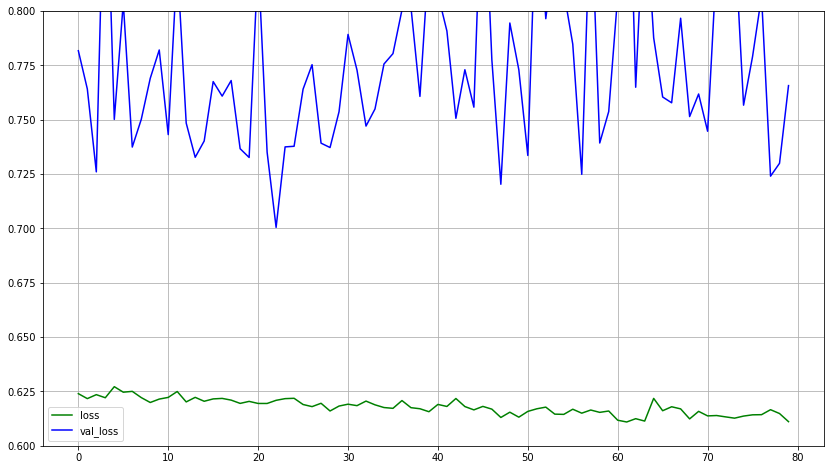

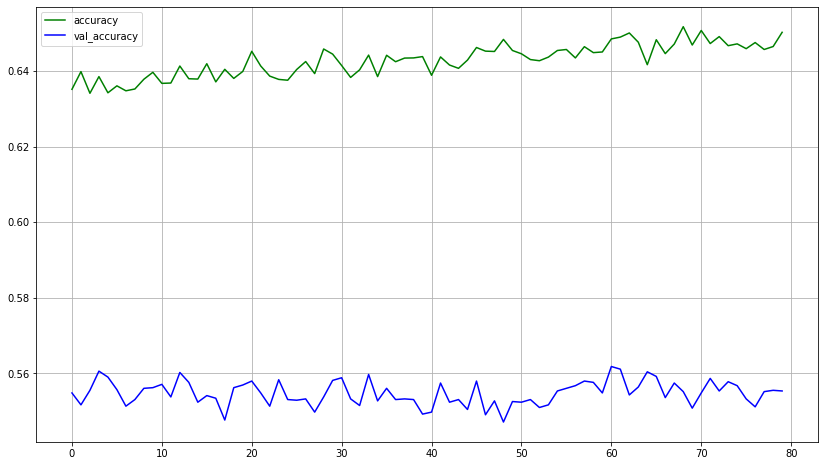

In [37]:
plot_history(model.history.history)

## Using Embedding layer

In [40]:
model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Flatten(),
    Dense(6, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 3846      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 163,853
Trainable params: 163,853
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test))

Epoch 1/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6933e-04 - accuracy: 0.9999 - val_loss: 2.1754 - val_accuracy: 0.8353
Epoch 2/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6908e-04 - accuracy: 0.9999 - val_loss: 2.1824 - val_accuracy: 0.8353
Epoch 3/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6904e-04 - accuracy: 0.9999 - val_loss: 2.1896 - val_accuracy: 0.8356
Epoch 4/15
716/716 [==============================] - 1s 2ms/step - loss: 1.6893e-04 - accuracy: 0.9999 - val_loss: 2.1958 - val_accuracy: 0.8356
Epoch 5/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6893e-04 - accuracy: 0.9999 - val_loss: 2.2031 - val_accuracy: 0.8354
Epoch 6/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6877e-04 - accuracy: 0.9999 - val_loss: 2.2105 - val_accuracy: 0.8353
Epoch 7/15
716/716 [==============================] - 2s 2ms/step - loss: 1.6840e-04 - accuracy: 0.9999 - val_loss: 2.2178 -

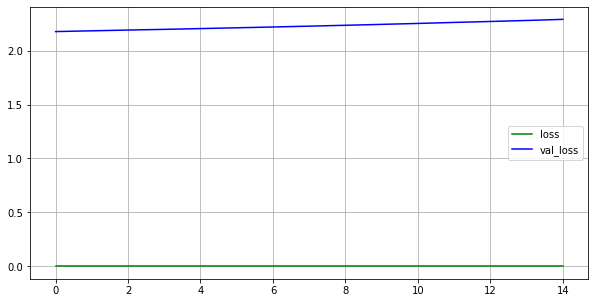

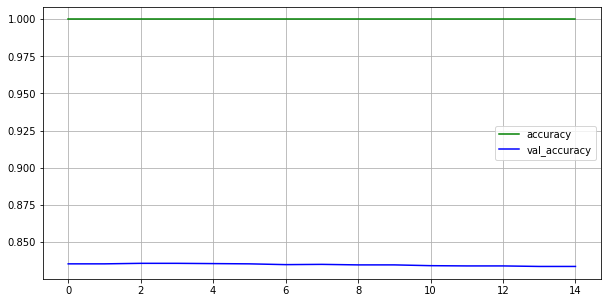

In [52]:
plot_history(model.history.history)

### Checking embedding weights

In [53]:
#embedding weights
e = model.layers[0]
weight = e.get_weights()[0]
print(weight.shape)

(10000, 16)


## Using Global pooling layer instead of Flatten

In [56]:
from tensorflow.keras.layers import GlobalAvgPool1D

model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    GlobalAvgPool1D(),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 85        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 6         
Total params: 160,091
Trainable params: 160,091
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test))

Epoch 1/15
716/716 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6918 - val_accuracy: 0.5257
Epoch 2/15
716/716 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6918 - val_accuracy: 0.5257
Epoch 3/15
716/716 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5257
Epoch 4/15
716/716 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5257
Epoch 5/15
716/716 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5257
Epoch 6/15
716/716 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6918 - val_accuracy: 0.5257
Epoch 7/15
716/716 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5231 - val_loss: 0.6919 - val_accuracy: 0.5257
Epoch 

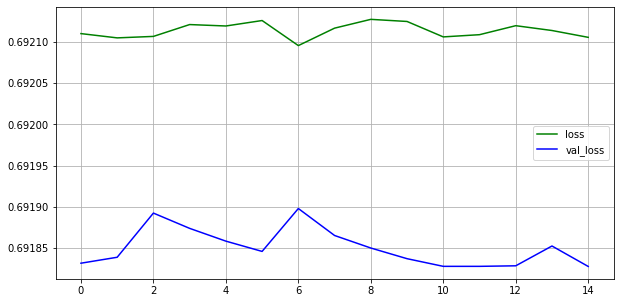

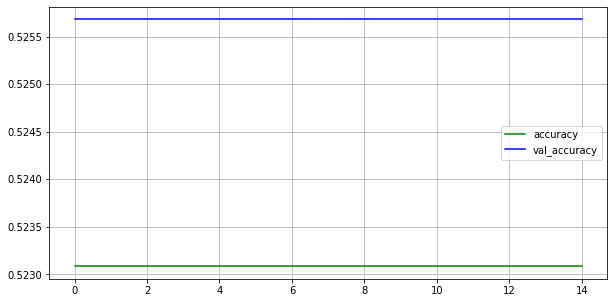

In [59]:
plot_history(model.history.history)

## Adding conv1d layer 

In [66]:
from tensorflow.keras.layers import Conv1D

model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Conv1D(50, 8, activation='relu'),
    GlobalAvgPool1D(),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 33, 50)            6450      
_________________________________________________________________
global_average_pooling1d_4 ( (None, 50)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 6         
Total params: 166,711
Trainable params: 166,711
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test))

Epoch 1/15
716/716 [==============================] - 2s 3ms/step - loss: 0.5520 - accuracy: 0.7416 - val_loss: 0.4593 - val_accuracy: 0.8258
Epoch 2/15
716/716 [==============================] - 2s 3ms/step - loss: 0.3594 - accuracy: 0.8849 - val_loss: 0.4079 - val_accuracy: 0.8326
Epoch 3/15
716/716 [==============================] - 2s 3ms/step - loss: 0.2620 - accuracy: 0.9206 - val_loss: 0.4058 - val_accuracy: 0.8447
Epoch 4/15
716/716 [==============================] - 2s 3ms/step - loss: 0.1989 - accuracy: 0.9425 - val_loss: 0.4331 - val_accuracy: 0.8374
Epoch 5/15
716/716 [==============================] - 2s 3ms/step - loss: 0.1563 - accuracy: 0.9594 - val_loss: 0.4871 - val_accuracy: 0.8379
Epoch 6/15
716/716 [==============================] - 2s 3ms/step - loss: 0.1284 - accuracy: 0.9672 - val_loss: 0.5381 - val_accuracy: 0.8342
Epoch 7/15
716/716 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9740 - val_loss: 0.6024 - val_accuracy: 0.8316
Epoch 

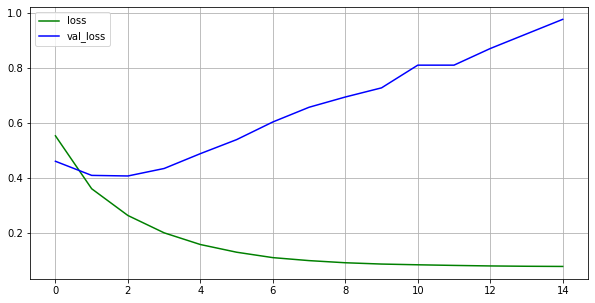

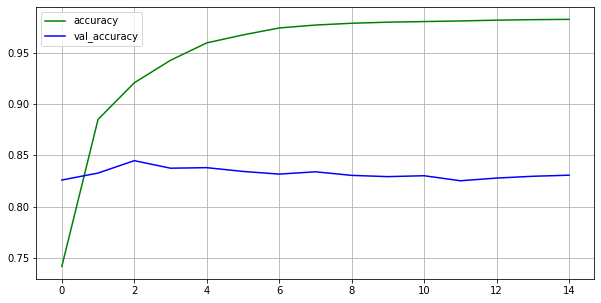

In [68]:
plot_history(model.history.history)

## Using LSTM

In [70]:
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 325       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 6         
Total params: 172,875
Trainable params: 172,875
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test))

Epoch 1/15
716/716 [==============================] - 11s 16ms/step - loss: 0.4093 - accuracy: 0.8056 - val_loss: 0.3561 - val_accuracy: 0.8485
Epoch 2/15
716/716 [==============================] - 12s 16ms/step - loss: 0.2236 - accuracy: 0.9076 - val_loss: 0.3312 - val_accuracy: 0.8546
Epoch 3/15
716/716 [==============================] - 12s 16ms/step - loss: 0.1502 - accuracy: 0.9436 - val_loss: 0.3848 - val_accuracy: 0.8515
Epoch 4/15
716/716 [==============================] - 11s 15ms/step - loss: 0.0998 - accuracy: 0.9643 - val_loss: 0.4381 - val_accuracy: 0.8513
Epoch 5/15
716/716 [==============================] - 11s 15ms/step - loss: 0.0622 - accuracy: 0.9790 - val_loss: 0.5116 - val_accuracy: 0.8478
Epoch 6/15
716/716 [==============================] - 11s 16ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.6695 - val_accuracy: 0.8382
Epoch 7/15
716/716 [==============================] - 11s 15ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.7131 - val_accuracy:

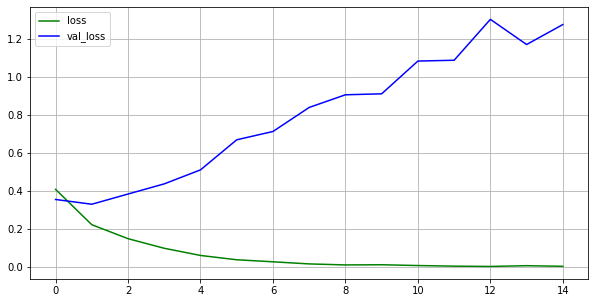

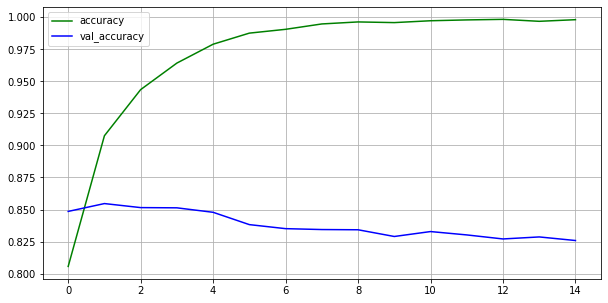

In [72]:
plot_history(model.history.history)

## Using Gated Recurrent Unit (GRU)

In [90]:
from tensorflow.keras.layers import GRU

model = Sequential([
    Embedding(vocab_size, embedding_dims, input_length=max_len),
    Bidirectional(GRU(12)),
    Dense(5, 'relu'),
    Dense(1, 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24)                2160      
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 125       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 6         
Total params: 162,291
Trainable params: 162,291
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test))

Epoch 1/15
716/716 [==============================] - 11s 15ms/step - loss: 0.4156 - accuracy: 0.8117 - val_loss: 0.3407 - val_accuracy: 0.8491
Epoch 2/15
716/716 [==============================] - 11s 15ms/step - loss: 0.2320 - accuracy: 0.9069 - val_loss: 0.3460 - val_accuracy: 0.8489
Epoch 3/15
716/716 [==============================] - 11s 15ms/step - loss: 0.1739 - accuracy: 0.9321 - val_loss: 0.3732 - val_accuracy: 0.8480
Epoch 4/15
716/716 [==============================] - 11s 16ms/step - loss: 0.1313 - accuracy: 0.9530 - val_loss: 0.4098 - val_accuracy: 0.8464
Epoch 5/15
716/716 [==============================] - 11s 16ms/step - loss: 0.0961 - accuracy: 0.9656 - val_loss: 0.5039 - val_accuracy: 0.8424
Epoch 6/15
716/716 [==============================] - 11s 15ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.5975 - val_accuracy: 0.8421
Epoch 7/15
716/716 [==============================] - 11s 15ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.7124 - val_accuracy:

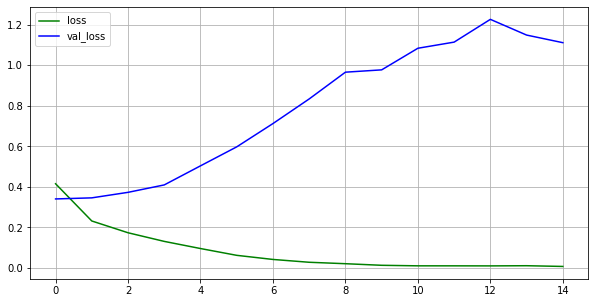

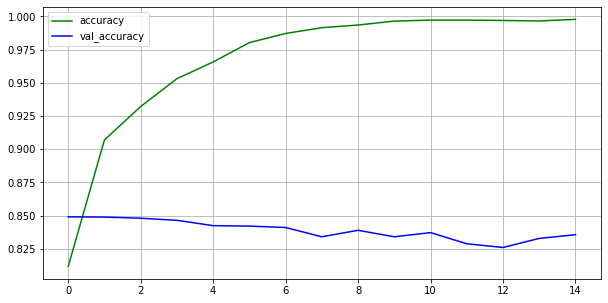

In [93]:
plot_history(model.history.history)

## Using callback

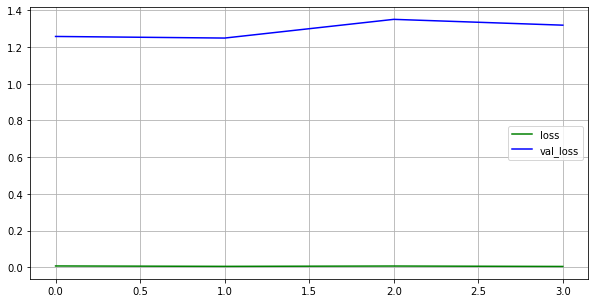

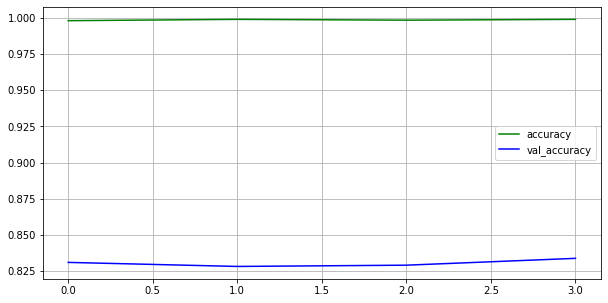

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(patience=2)
model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_test_padded, y_test), callbacks=callback)
plot_history(model.history.history)